# Import 所有用的的 package 和 module

In [99]:
import pandas as pd
import numpy as np
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import OrdinalEncoder
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import cross_val_score
from sklearn.metrics import classification_report, confusion_matrix
import seaborn as sns
import plotly.express as px
import matplotlib.pyplot as plt

# 把 train data 和 test data 讀進來

In [100]:
df_train = pd.read_csv("train.csv")
df_test = pd.read_csv("test.csv")

# 觀察 train data 和 test data 資料筆數和欄位數目

In [101]:
print(f"Shape of train data: {df_train.shape}")
print(f"Shape of test data: {df_test.shape}")

Shape of train data: (140700, 20)
Shape of test data: (93800, 19)


# 印出 train data 前五筆資料

In [102]:
print("First 5 rows of train data:")
df_train.head()

First 5 rows of train data:


,id,Name,Gender,Age,City,Working Professional or Student,Profession,Academic Pressure,Work Pressure,CGPA,Study Satisfaction,Job Satisfaction,Sleep Duration,Dietary Habits,Degree,Have you ever had suicidal thoughts ?,Work/Study Hours,Financial Stress,Family History of Mental Illness,Depression
0,0,Aaradhya,Female,49.0,Ludhiana,Working Professional,Chef,NaN,5.0,NaN,NaN,2.0,More than 8 hours,Healthy,BHM,No,1.0,2.0,No,0
1,1,Vivan,Male,26.0,Varanasi,Working Professional,Teacher,NaN,4.0,NaN,NaN,3.0,Less than 5 hours,Unhealthy,LLB,Yes,7.0,3.0,No,1
2,2,Yuvraj,Male,33.0,Visakhapatnam,Student,NaN,5.0,NaN,8.97,2.0,NaN,5-6 hours,Healthy,B.Pharm,Yes,3.0,1.0,No,1
3,3,Yuvraj,Male,22.0,Mumbai,Working Professional,Teacher,NaN,5.0,NaN,NaN,1.0,Less than 5 hours,Moderate,BBA,Yes,10.0,1.0,Yes,1
4,4,Rhea,Female,30.0,Kanpur,Working Professional,Business Analyst,NaN,1.0,NaN,NaN,1.0,5-6 hours,Unhealthy,BBA,Yes,9.0,4.0,Yes,0


# 印出 test data 前五筆資料

In [103]:
print("First 5 rows of test data:")
df_test.head()

First 5 rows of test data:


,id,Name,Gender,Age,City,Working Professional or Student,Profession,Academic Pressure,Work Pressure,CGPA,Study Satisfaction,Job Satisfaction,Sleep Duration,Dietary Habits,Degree,Have you ever had suicidal thoughts ?,Work/Study Hours,Financial Stress,Family History of Mental Illness
0,140700,Shivam,Male,53.0,Visakhapatnam,Working Professional,Judge,NaN,2.0,NaN,NaN,5.0,Less than 5 hours,Moderate,LLB,No,9.0,3.0,Yes
1,140701,Sanya,Female,58.0,Kolkata,Working Professional,Educational Consultant,NaN,2.0,NaN,NaN,4.0,Less than 5 hours,Moderate,B.Ed,No,6.0,4.0,No
2,140702,Yash,Male,53.0,Jaipur,Working Professional,Teacher,NaN,4.0,NaN,NaN,1.0,7-8 hours,Moderate,B.Arch,Yes,12.0,4.0,No
3,140703,Nalini,Female,23.0,Rajkot,Student,NaN,5.0,NaN,6.84,1.0,NaN,More than 8 hours,Moderate,BSc,Yes,10.0,4.0,No
4,140704,Shaurya,Male,47.0,Kalyan,Working Professional,Teacher,NaN,5.0,NaN,NaN,5.0,7-8 hours,Moderate,BCA,Yes,3.0,4.0,No


# 查看 train data 的 missing value 情形

In [104]:
missing_values = df_train.isnull().sum()
print("The number of missing values ​​before data processing:")
print(missing_values)

The number of missing values ​​before data processing:
id                                            0
Name                                          0
Gender                                        0
Age                                           0
City                                          0
Working Professional or Student               0
Profession                                36630
Academic Pressure                        112803
Work Pressure                             27918
CGPA                                     112802
Study Satisfaction                       112803
Job Satisfaction                          27910
Sleep Duration                                0
Dietary Habits                                4
Degree                                        2
Have you ever had suicidal thoughts ?         0
Work/Study Hours                              0
Financial Stress                              4
Family History of Mental Illness              0
Depression                       

# 查看每個欄位的資料型態

In [64]:
df_train.dtypes

,0
id,int64
Name,object
Gender,object
Age,float64
City,object
Working Professional or Student,object
Profession,object
Academic Pressure,float64
Work Pressure,float64
CGPA,float64


# 以下連續五張圖為 Numerical 欄位中有 missing value 的欄位資料分佈情形

In [92]:
fig = px.histogram(df_train, x='Academic Pressure', title=f'Countplot of Academic Pressure')
fig.show()

In [66]:
fig = px.histogram(df_train, x='Work Pressure', title=f'Countplot of Work Pressure')
fig.show()

In [67]:
fig = px.histogram(df_train, x='CGPA', title=f'Countplot of CGPA')
fig.show()

In [68]:
fig = px.histogram(df_train, x='Study Satisfaction', title=f'Countplot of Study Satisfaction')
fig.show()

In [69]:
fig = px.histogram(df_train, x='Job Satisfaction', title=f'Countplot of Job Satisfaction')
fig.show()

# 查看 class label 分佈的情形

In [105]:
target_col = 'Depression'
label_distribution = df_train[target_col].value_counts()
labels = ["Non-Depression", "Depression"]

fig = px.pie(names=labels, values=label_distribution, title='Distribution of Class label')
fig.show()

# 先將 "id" 和 "Name" 兩個欄位刪除

In [106]:
test_ids = df_test['id']
df_train = df_train.drop(columns = ['id', 'Name'], axis=1)
df_test = df_test.drop(columns = ['id', 'Name'], axis=1)
display(df_train.head())

,Gender,Age,City,Working Professional or Student,Profession,Academic Pressure,Work Pressure,CGPA,Study Satisfaction,Job Satisfaction,Sleep Duration,Dietary Habits,Degree,Have you ever had suicidal thoughts ?,Work/Study Hours,Financial Stress,Family History of Mental Illness,Depression
0,Female,49.0,Ludhiana,Working Professional,Chef,NaN,5.0,NaN,NaN,2.0,More than 8 hours,Healthy,BHM,No,1.0,2.0,No,0
1,Male,26.0,Varanasi,Working Professional,Teacher,NaN,4.0,NaN,NaN,3.0,Less than 5 hours,Unhealthy,LLB,Yes,7.0,3.0,No,1
2,Male,33.0,Visakhapatnam,Student,NaN,5.0,NaN,8.97,2.0,NaN,5-6 hours,Healthy,B.Pharm,Yes,3.0,1.0,No,1
3,Male,22.0,Mumbai,Working Professional,Teacher,NaN,5.0,NaN,NaN,1.0,Less than 5 hours,Moderate,BBA,Yes,10.0,1.0,Yes,1
4,Female,30.0,Kanpur,Working Professional,Business Analyst,NaN,1.0,NaN,NaN,1.0,5-6 hours,Unhealthy,BBA,Yes,9.0,4.0,Yes,0


# 對 Numerical 欄位和 Categorical 欄位分開進行前處理

In [112]:
X_train = df_train.iloc[:, :-1]
y_train = df_train.iloc[:, -1]


numerical_cols = X_train.select_dtypes(include=['float64', 'int64']).columns.tolist()
categorical_cols = X_train.select_dtypes(include=['object']).columns.tolist()


# Preprocessing numerical columns
imputer = SimpleImputer(strategy='median')
numerical_X_train_imputed = imputer.fit_transform(X_train[numerical_cols])
numerical_X_test_imputed = imputer.transform(df_test[numerical_cols])


# Preprocessing categorical columns
imputer = SimpleImputer(strategy='constant', fill_value='missing')
categorical_X_train_imputed = imputer.fit_transform(X_train[categorical_cols])
categorical_X_test_imputed = imputer.transform(df_test[categorical_cols])


# ordinal encode
encoder = OrdinalEncoder(dtype = np.int32, handle_unknown='use_encoded_value', unknown_value=-1)
categorical_X_train_ordered = encoder.fit_transform(categorical_X_train_imputed)
categorical_X_test_ordered = encoder.transform(categorical_X_test_imputed)


# merge numerical columns and categorical columns
X_train_preprocessed = np.hstack((numerical_X_train_imputed, categorical_X_train_ordered))
X_test_preprocessed = np.hstack((numerical_X_test_imputed, categorical_X_test_ordered))


# display preprocessing
cols = numerical_cols + categorical_cols
X_train_preprocessed_df = pd.DataFrame(X_train_preprocessed, columns=cols)
display(X_train_preprocessed_df.head())

,Age,Academic Pressure,Work Pressure,CGPA,Study Satisfaction,Job Satisfaction,Work/Study Hours,Financial Stress,Gender,City,Working Professional or Student,Profession,Sleep Duration,Dietary Habits,Degree,Have you ever had suicidal thoughts ?,Family History of Mental Illness
0,49.0,3.0,5.0,7.77,3.0,2.0,1.0,2.0,0.0,50.0,1.0,10.0,29.0,7.0,33.0,0.0,0.0
1,26.0,3.0,4.0,7.77,3.0,3.0,7.0,3.0,1.0,93.0,1.0,55.0,27.0,20.0,63.0,1.0,0.0
2,33.0,5.0,3.0,8.97,2.0,3.0,3.0,1.0,1.0,97.0,0.0,64.0,15.0,7.0,21.0,1.0,0.0
3,22.0,3.0,5.0,7.77,3.0,1.0,10.0,1.0,1.0,64.0,1.0,55.0,27.0,15.0,28.0,1.0,1.0
4,30.0,3.0,1.0,7.77,3.0,1.0,9.0,4.0,0.0,37.0,1.0,9.0,15.0,20.0,28.0,1.0,1.0


# 將 train data 分成 training set 和 validation set

In [113]:
X_train_split, X_val_split, y_train_split, y_val_split = train_test_split(X_train_preprocessed, y_train, test_size=0.2, random_state=42)

# 以下為 Decision tree 用 "gini" 計算 impurity 的部分
找出最佳深度

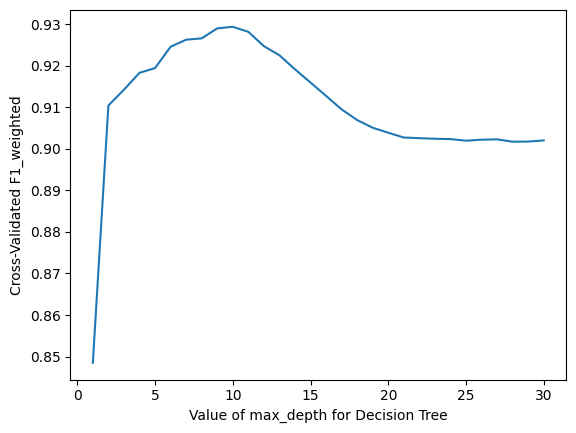

Optimal depth is 9


In [114]:
depth_range = range(1, 31)
depth_scores = []
prev_score = 0
optimal_depth = 0
for depth in depth_range:
  model = DecisionTreeClassifier(criterion='gini', max_depth=depth, random_state=42)
  scores = cross_val_score(model, X_train_preprocessed, y_train, cv=10, scoring='f1_weighted')
  depth_scores.append(scores.mean())
  if scores.mean() - prev_score > 0.001:
    prev_score = scores.mean()
    optimal_depth = depth

plt.plot(depth_range,depth_scores)
plt.xlabel('Value of max_depth for Decision Tree')
plt.ylabel('Cross-Validated F1_weighted')
plt.show()

print(f'Optimal depth is {optimal_depth}')

評估模型

Validation Set Classification Report:
                precision    recall  f1-score   support

Non-Depression       0.96      0.96      0.96     22986
    Depression       0.81      0.80      0.81      5154

      accuracy                           0.93     28140
     macro avg       0.88      0.88      0.88     28140
  weighted avg       0.93      0.93      0.93     28140



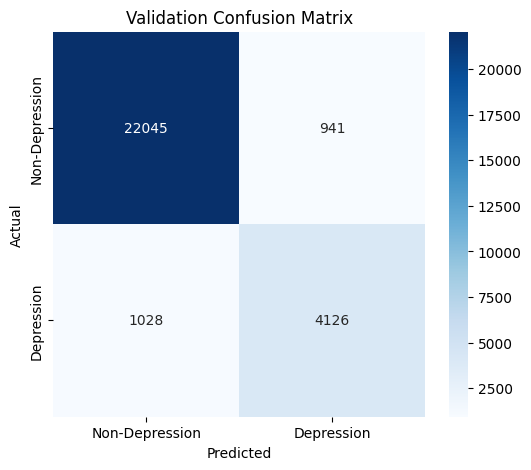

In [115]:
model = DecisionTreeClassifier(criterion='gini', max_depth=optimal_depth, random_state=42)

# 訓練模型
model.fit(X_train_split, y_train_split)

# 預測
y_val_pred = model.predict(X_val_split)



print("Validation Set Classification Report:")
print(classification_report(y_val_split, y_val_pred, target_names=["Non-Depression", "Depression"]))


# 繪製混淆矩陣
cm = confusion_matrix(y_val_split, y_val_pred)
plt.figure(figsize=(6, 5))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=["Non-Depression", "Depression"], yticklabels=["Non-Depression", "Depression"])
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("Validation Confusion Matrix")
plt.show()

輸出預測結果（可丟到 kaggle 網站上查看模型訓練後的預測結果）

In [116]:
y_test_pred = model.predict(X_test_preprocessed)

# 輸出結果
predictions = pd.DataFrame({"id": test_ids, target_col: y_test_pred})

# 保存結果到CSV
predictions.to_csv("Decision tree gini ver.csv", index=False)

# 以下為 Decision tree 用 "entropy" 計算 impurity 的部分
找出最佳深度

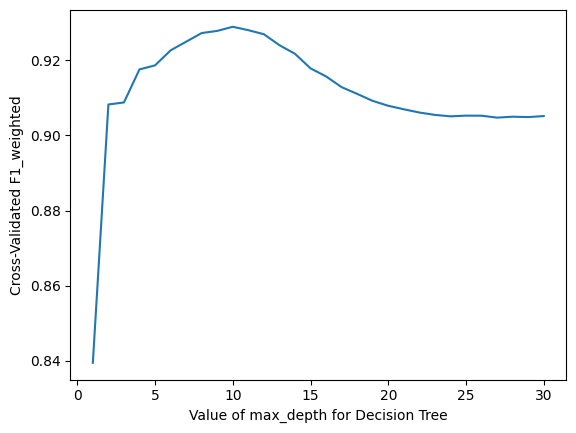

Optimal depth is 10


In [117]:
depth_range = range(1, 31)
depth_scores = []
prev_score = 0
optimal_depth = 0
for depth in depth_range:
  model = DecisionTreeClassifier(criterion='entropy', max_depth=depth, random_state=42)
  scores = cross_val_score(model, X_train_preprocessed, y_train, cv=10, scoring='f1_weighted')
  depth_scores.append(scores.mean())
  if scores.mean() - prev_score > 0.01:
    prev_score = scores.mean()
    optimal_depth = depth

plt.plot(depth_range,depth_scores)
plt.xlabel('Value of max_depth for Decision Tree')
plt.ylabel('Cross-Validated F1_weighted')
plt.show()

print(f'Optimal depth is {optimal_depth}')

評估模型

Validation Set Classification Report:
                precision    recall  f1-score   support

Non-Depression       0.95      0.96      0.96     22986
    Depression       0.83      0.79      0.80      5154

      accuracy                           0.93     28140
     macro avg       0.89      0.87      0.88     28140
  weighted avg       0.93      0.93      0.93     28140



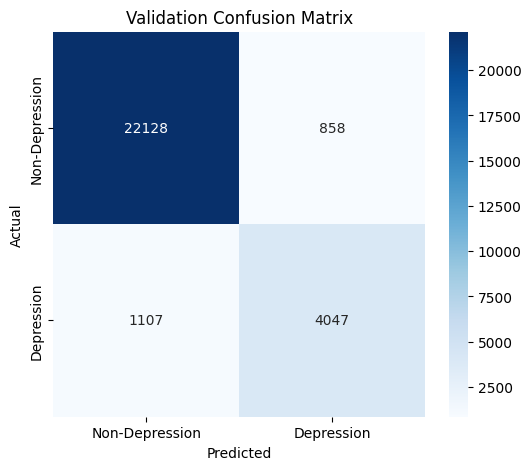

In [118]:
model = DecisionTreeClassifier(criterion='entropy', max_depth=10, random_state=42)

# 訓練模型
model.fit(X_train_split, y_train_split)

# 預測
y_val_pred = model.predict(X_val_split)




print("Validation Set Classification Report:")
print(classification_report(y_val_split, y_val_pred, target_names=["Non-Depression", "Depression"]))


# 繪製混淆矩陣
cm = confusion_matrix(y_val_split, y_val_pred)
plt.figure(figsize=(6, 5))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=["Non-Depression", "Depression"], yticklabels=["Non-Depression", "Depression"])
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("Validation Confusion Matrix")
plt.show()

輸出預測結果（可丟到 kaggle 網站上查看模型訓練後的預測結果）

In [119]:
y_test_pred = model.predict(X_test_preprocessed)

# 輸出結果
predictions = pd.DataFrame({"id": test_ids, target_col: y_test_pred})

# 保存結果到CSV
predictions.to_csv("Decision tree entropy ver.csv", index=False)

#以下為Random forest的部分
找出最佳深度

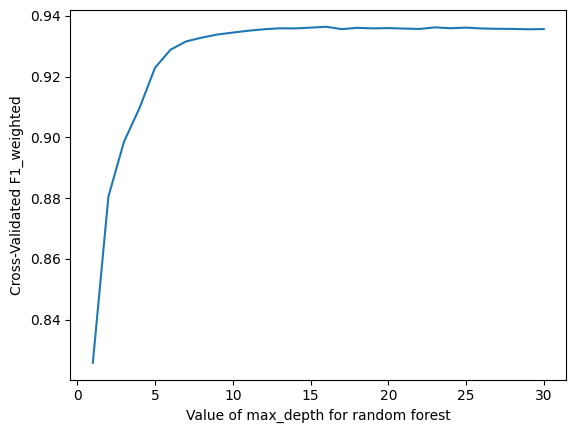

Optimal depth is 9


In [109]:
depth_range = range(1, 31)
depth_scores = []
prev_score = 0
optimal_depth = 0
for depth in depth_range:
  model = RandomForestClassifier(criterion='gini', max_depth=depth, random_state=42)
  scores = cross_val_score(model, X_train_preprocessed, y_train, cv=10, scoring='f1_weighted')
  depth_scores.append(scores.mean())
  if scores.mean() - prev_score > 0.01:
    prev_score = scores.mean()
    optimal_depth = depth

plt.plot(depth_range,depth_scores)
plt.xlabel(f'Value of max_depth for random forest')
plt.ylabel('Cross-Validated F1_weighted')
plt.show()

print(f'Optimal depth is {optimal_depth}')

評估模型

Validation Set Classification Report:
                precision    recall  f1-score   support

Non-Depression       0.95      0.97      0.96     22986
    Depression       0.84      0.79      0.82      5154

      accuracy                           0.94     28140
     macro avg       0.90      0.88      0.89     28140
  weighted avg       0.93      0.94      0.93     28140



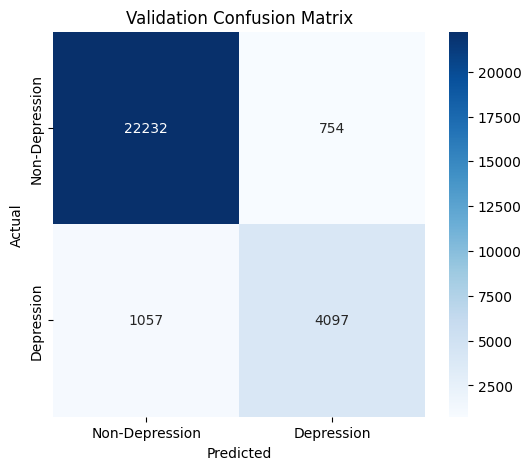

In [110]:
model = RandomForestClassifier(criterion='gini', max_depth=optimal_depth, random_state=42)

# 訓練模型
model.fit(X_train_split, y_train_split)

# 預測
y_val_pred = model.predict(X_val_split)


print("Validation Set Classification Report:")
print(classification_report(y_val_split, y_val_pred, target_names=["Non-Depression", "Depression"]))


# 繪製混淆矩陣
cm = confusion_matrix(y_val_split, y_val_pred)
plt.figure(figsize=(6, 5))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=["Non-Depression", "Depression"], yticklabels=["Non-Depression", "Depression"])
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("Validation Confusion Matrix")
plt.show()

輸出預測結果（可丟到 kaggle 網站上查看模型訓練後的預測結果）

In [111]:
y_test_pred = model.predict(X_test_preprocessed)

# 輸出結果
predictions = pd.DataFrame({"id": test_ids, target_col: y_test_pred})

# 保存結果到CSV
predictions.to_csv("random forest.csv", index=False)